In [11]:
#sử dụng SVM không thông qua sklearn SVC, LinearSVC và SGDClassifier
import numpy as np
class SVM:
    def __init__ (self, learning_rate = 0.005, lamda_param = 0.01, n_iters = 1000):
        self.lr = learning_rate
        self.lamda_param = lamda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None
    def fit(self, x, y):
        n_samples, n_features = x.shape
        
        y_ = np.where(y <= 0, -1, 1)
        
        #init weights
        self.w = np.zeros(n_features)
        self.b = 0
        
        for _ in range(self.n_iters):
            for idex, x_i in enumerate(x):
                condition = y_[idex] * (np.dot(x_i, self.w )- self.b) >= 1
                if condition == True:
                    self.w -= self.lr * ( 2* self.lamda_param*self.w)
                else: 
                    self.w -= self.lr *( 2* self.lamda_param *self.w - np.dot(x_i, y_[idex]))
                    self.b -= self.lr *y_[idex]
        
    def predict(self, x):
        approx = np.dot(x, self.w) - self.b
        return np.sign(approx) 

In [12]:
if __name__ == "__main__":
    #khai bao thu vien
    from sklearn.model_selection import train_test_split
    from sklearn import datasets
    import matplotlib.pyplot as plt
    
    x, y = datasets.make_blobs(n_samples = 50, n_features = 2, centers = 2, cluster_std = 1.5, random_state = 100)
    y = np.where(y == 0, 1, -1)
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 100)
    

In [13]:

model=SVM() 
model.fit(x_train, y_train)
pre = model.predict(x_test)

In [14]:
def accuracy(y_true, y_pre):
    accuracy = np.sum(y_true == y_pre) / len(y_true)
    return accuracy
print(accuracy(y_test, pre))

1.0


In [15]:
# the kernel trick
#1 vi du khac khi khong the su dung linear de phan cum data
#trong trường hợp này sử dụng SVM(kernel = 'linear') không đạt kết quả tốt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from matplotlib.colors import ListedColormap
from mpl_toolkits import mplot3d
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

df = pd.read_excel("SVM_Data.xlsx")
print(df.head())
X = df.loc[:, ["X1", "X2"]].values
y1 = df.loc[:, "Y"].values
print(y)
x1_train, x1_test, y1_train, y1_test = train_test_split(X, y1, test_size = 0.3, random_state =100)

         X1        X2  Y
0 -0.364924  0.230728  1
1 -0.293515 -0.974130  0
2  0.470622  0.966409  0
3 -0.549030  0.869911  0
4 -1.072329 -0.195141  0
[-1 -1  1  1  1  1 -1 -1  1 -1  1 -1 -1  1  1  1  1  1  1 -1  1 -1 -1 -1
 -1  1 -1  1  1 -1  1  1 -1 -1  1 -1 -1 -1 -1  1  1 -1 -1  1  1  1  1 -1
 -1 -1]


In [16]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel = 'linear') #kernel = linear
classifier.fit(x1_train, y1_train.ravel())
pre1 = classifier.predict(x1_test)
accuracy1 = accuracy_score(y1_test, pre1)
accuracy1

0.6

In [17]:
'''Hàm plot data'''
#Ploting decision boundary function

zero_one_colourmap = ListedColormap(('red', 'green'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

# Ploting 3D 
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap=zero_one_colourmap)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

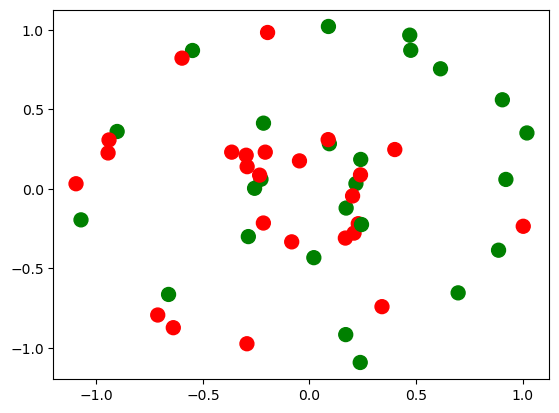

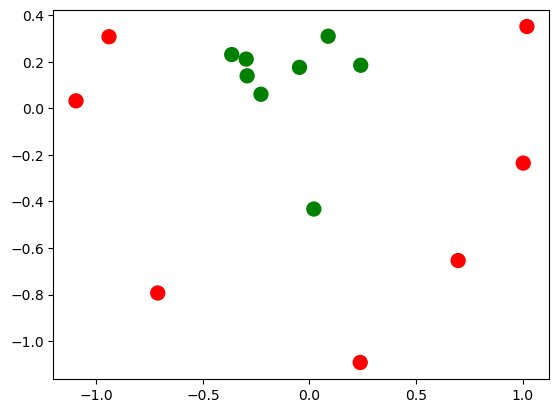

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

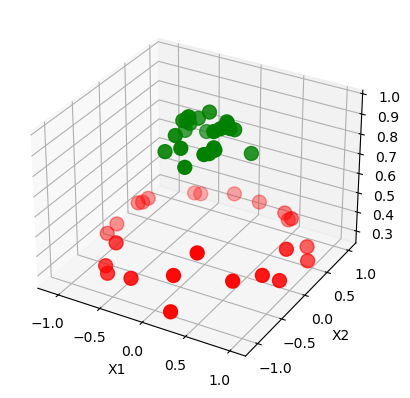

In [18]:
plt.scatter(X[:,0],X[:,1], c=y, s=100, cmap = zero_one_colourmap)
plt.show()
plt.scatter(x1_test[:,0],x1_test[:,1], c=y1_test, s=100, cmap = zero_one_colourmap)
plt.show()
''' đỏ = 0; xanh = 1'''

plot_3d_plot(X, y1)

C:\Users\ainzo\AppData\Local\Temp\ipykernel_680\3167198078.py:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


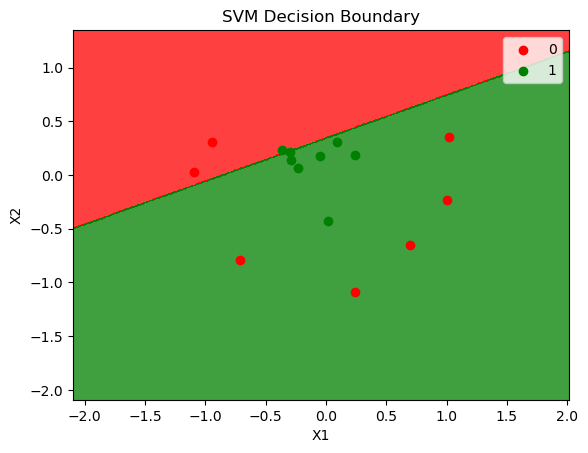

In [19]:
plot_decision_boundary(x1_test, y1_test, classifier)

C:\Users\ainzo\AppData\Local\Temp\ipykernel_680\3167198078.py:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


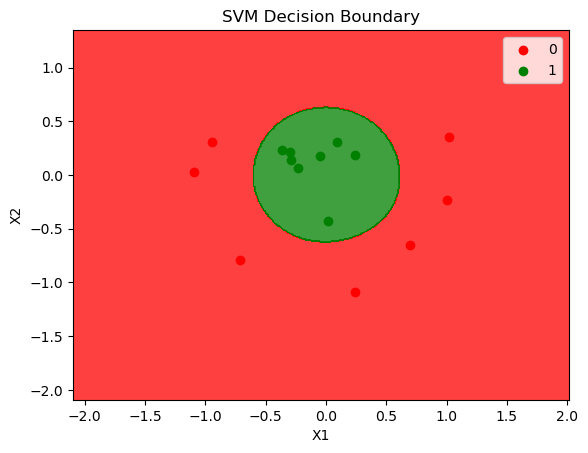

In [20]:
#sử dụng svm nhưng với kernel = "rbf" (the radial kernel)

rbf_classifier = SVC(kernel="rbf") #rbf ánh xạ tập dữ liệu 2 chiều sang 3 chiều
rbf_classifier.fit(x1_train, y1_train.ravel())
y1_pred = rbf_classifier.predict(x1_test)

accuracy_score(y1_test, y1_pred)


'''kết quả hình dưới'''
plot_decision_boundary(x1_test, y1_test, rbf_classifier)
